In [46]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

In [47]:
x = np.array([-3, -1, 1, 2])
fx = np.array([11, -1, 6, -2])

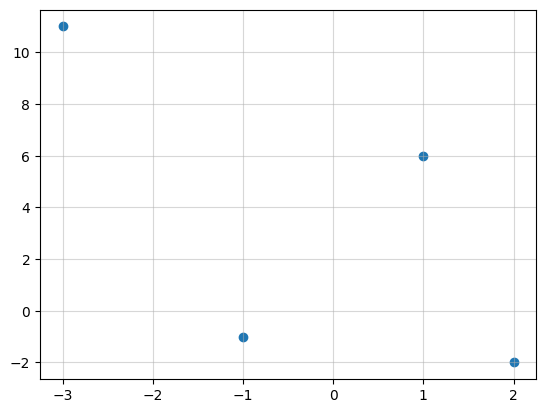

In [48]:
plt.scatter(x, fx)
plt.grid(alpha=0.5)
plt.show()

# Scipy implementation

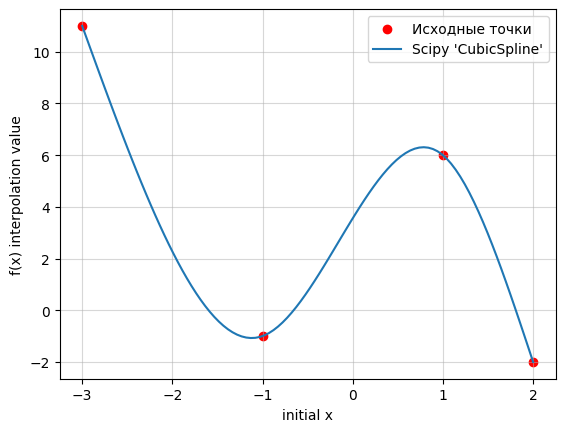

In [49]:
cs = CubicSpline(x, fx, bc_type="natural")

x_new = np.linspace(-3, 2, 100)  
fx_interp = cs(x_new)
plt.scatter(x, fx, c="red", label="Исходные точки")
plt.plot(x_new, fx_interp, label="Scipy 'CubicSpline'")
plt.xlabel("initial x")
plt.ylabel("f(x) interpolation value")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Implementation

In [50]:
def cubic_spline_interpolation(x: np.ndarray, fx: np.ndarray, return_counts=100):
    n = len(x)
    
    hs = np.diff(x)
    
    A = np.zeros((n, n))
    B = np.zeros(n)
    # Граничные условия - естественный сплайн
    # Вторая производная слева и справа = 0
    A[0, 0] = 1
    A[-1, -1] = 1
    
    for i in range(1, n-1):
        A[i, i-1] = hs[i-1]              # c1
        A[i, i] = 2 * (hs[i-1] + hs[i])  # c2
        A[i, i+1] = hs[i]                # c3
        B[i] = 3 * ((fx[i+1] - fx[i]) / hs[i] - (fx[i] - fx[i-1]) / hs[i-1])
    
    c = np.linalg.solve(A, B)
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    
    for i in range(n-1):
        b[i] = (fx[i+1] - fx[i]) / hs[i] - hs[i] * (2*c[i] + c[i+1]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * hs[i])
    
    x_new = np.linspace(x[0], x[-1], return_counts)
    y_new = np.zeros(return_counts)
    
    for i in range(return_counts):
        for j in range(n-1):
            if x[j] <= x_new[i] <= x[j+1]:
                dx = x_new[i] - x[j]
                y_new[i] = fx[j] + b[j]*dx + c[j]*dx**2 + d[j]*dx**3
                break
    
    return x_new, y_new


my_x_new, my_y_new = cubic_spline_interpolation(x, fx)

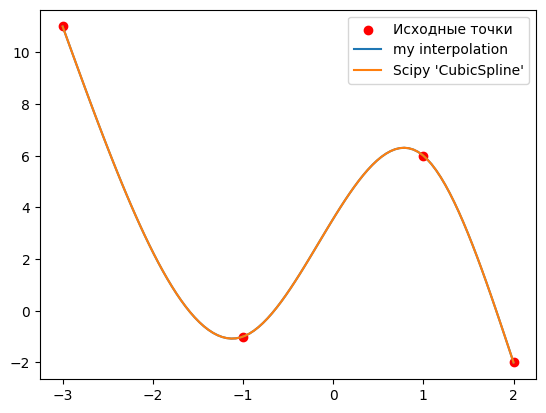

In [51]:
plt.scatter(x, fx, c="red", label="Исходные точки")
plt.plot(my_x_new, my_y_new, label="my interpolation")
plt.plot(x_new, fx_interp, label="Scipy 'CubicSpline'")
plt.legend()
plt.show()